## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -1.177536  0.749930  1.679181  0.913265  1.523550  1.059830
1  0.547683  0.531762  0.500312 -1.628512 -0.789251 -0.513662
2 -0.143843  0.825956  1.527596  1.222145  0.397981  1.809150
3 -1.567112 -0.515565 -0.336584  1.483879 -1.466513 -0.742108
4  1.588551  1.430586  0.017239 -1.577462 -0.536598 -1.810083


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0090167	total: 69.4ms	remaining: 1m 9s
1:	learn: 0.9965427	total: 70ms	remaining: 34.9s
2:	learn: 0.9851193	total: 70.5ms	remaining: 23.4s
3:	learn: 0.9750042	total: 71ms	remaining: 17.7s
4:	learn: 0.9656825	total: 71.6ms	remaining: 14.2s
5:	learn: 0.9565166	total: 72.1ms	remaining: 12s
6:	learn: 0.9441301	total: 72.8ms	remaining: 10.3s
7:	learn: 0.9343389	total: 73.3ms	remaining: 9.09s
8:	learn: 0.9250382	total: 74ms	remaining: 8.14s
9:	learn: 0.9163965	total: 74.5ms	remaining: 7.38s
10:	learn: 0.9070805	total: 74.9ms	remaining: 6.74s
11:	learn: 0.8959660	total: 75.4ms	remaining: 6.21s
12:	learn: 0.8860588	total: 75.9ms	remaining: 5.76s
13:	learn: 0.8787304	total: 76.4ms	remaining: 5.38s
14:	learn: 0.8708905	total: 76.9ms	remaining: 5.05s
15:	learn: 0.8618900	total: 77.3ms	remaining: 4.76s
16:	learn: 0.8531991	total: 77.8ms	remaining: 4.5s
17:	learn: 0.8446571	total: 78.3ms	remaining: 4.27s
18:	learn: 0.8351907	total: 78.9ms	remaining: 4.07s
1

86:	learn: 0.4539438	total: 110ms	remaining: 1.15s
87:	learn: 0.4499497	total: 110ms	remaining: 1.14s
88:	learn: 0.4462523	total: 111ms	remaining: 1.13s
89:	learn: 0.4424952	total: 111ms	remaining: 1.12s
90:	learn: 0.4384112	total: 111ms	remaining: 1.11s
91:	learn: 0.4344061	total: 112ms	remaining: 1.1s
92:	learn: 0.4309404	total: 112ms	remaining: 1.09s
93:	learn: 0.4274350	total: 113ms	remaining: 1.09s
94:	learn: 0.4246829	total: 113ms	remaining: 1.08s
95:	learn: 0.4216421	total: 114ms	remaining: 1.07s
96:	learn: 0.4186245	total: 114ms	remaining: 1.06s
97:	learn: 0.4160248	total: 115ms	remaining: 1.05s
98:	learn: 0.4133192	total: 115ms	remaining: 1.04s
99:	learn: 0.4101441	total: 115ms	remaining: 1.04s
100:	learn: 0.4069750	total: 116ms	remaining: 1.03s
101:	learn: 0.4038394	total: 116ms	remaining: 1.02s
102:	learn: 0.4012137	total: 116ms	remaining: 1.01s
103:	learn: 0.3982387	total: 117ms	remaining: 1.01s
104:	learn: 0.3947605	total: 117ms	remaining: 1s
105:	learn: 0.3913882	total: 1

251:	learn: 0.1352279	total: 187ms	remaining: 556ms
252:	learn: 0.1343907	total: 188ms	remaining: 555ms
253:	learn: 0.1334151	total: 188ms	remaining: 553ms
254:	learn: 0.1325763	total: 189ms	remaining: 552ms
255:	learn: 0.1315963	total: 189ms	remaining: 550ms
256:	learn: 0.1305636	total: 190ms	remaining: 549ms
257:	learn: 0.1295180	total: 190ms	remaining: 548ms
258:	learn: 0.1284130	total: 191ms	remaining: 546ms
259:	learn: 0.1273496	total: 191ms	remaining: 545ms
260:	learn: 0.1264686	total: 192ms	remaining: 544ms
261:	learn: 0.1257344	total: 193ms	remaining: 542ms
262:	learn: 0.1247445	total: 193ms	remaining: 541ms
263:	learn: 0.1235776	total: 194ms	remaining: 542ms
264:	learn: 0.1229328	total: 195ms	remaining: 540ms
265:	learn: 0.1218127	total: 195ms	remaining: 539ms
266:	learn: 0.1210826	total: 196ms	remaining: 537ms
267:	learn: 0.1204886	total: 196ms	remaining: 536ms
268:	learn: 0.1194737	total: 197ms	remaining: 534ms
269:	learn: 0.1186254	total: 197ms	remaining: 533ms
270:	learn: 

466:	learn: 0.0452950	total: 293ms	remaining: 335ms
467:	learn: 0.0452316	total: 294ms	remaining: 334ms
468:	learn: 0.0449880	total: 294ms	remaining: 333ms
469:	learn: 0.0449257	total: 295ms	remaining: 332ms
470:	learn: 0.0446731	total: 295ms	remaining: 332ms
471:	learn: 0.0446126	total: 296ms	remaining: 331ms
472:	learn: 0.0443312	total: 296ms	remaining: 330ms
473:	learn: 0.0440592	total: 297ms	remaining: 329ms
474:	learn: 0.0439988	total: 297ms	remaining: 329ms
475:	learn: 0.0437649	total: 298ms	remaining: 328ms
476:	learn: 0.0435234	total: 298ms	remaining: 327ms
477:	learn: 0.0434643	total: 299ms	remaining: 326ms
478:	learn: 0.0431944	total: 299ms	remaining: 325ms
479:	learn: 0.0429596	total: 300ms	remaining: 324ms
480:	learn: 0.0429015	total: 300ms	remaining: 324ms
481:	learn: 0.0426984	total: 300ms	remaining: 323ms
482:	learn: 0.0424189	total: 301ms	remaining: 322ms
483:	learn: 0.0423622	total: 301ms	remaining: 321ms
484:	learn: 0.0421355	total: 302ms	remaining: 320ms
485:	learn: 

630:	learn: 0.0208686	total: 371ms	remaining: 217ms
631:	learn: 0.0207725	total: 372ms	remaining: 217ms
632:	learn: 0.0206715	total: 373ms	remaining: 216ms
633:	learn: 0.0205630	total: 373ms	remaining: 215ms
634:	learn: 0.0204195	total: 374ms	remaining: 215ms
635:	learn: 0.0203315	total: 374ms	remaining: 214ms
636:	learn: 0.0202404	total: 374ms	remaining: 213ms
637:	learn: 0.0201431	total: 375ms	remaining: 213ms
638:	learn: 0.0200393	total: 375ms	remaining: 212ms
639:	learn: 0.0199011	total: 376ms	remaining: 211ms
640:	learn: 0.0198067	total: 376ms	remaining: 211ms
641:	learn: 0.0196721	total: 377ms	remaining: 210ms
642:	learn: 0.0195553	total: 377ms	remaining: 209ms
643:	learn: 0.0194559	total: 378ms	remaining: 209ms
644:	learn: 0.0193281	total: 378ms	remaining: 208ms
645:	learn: 0.0192581	total: 379ms	remaining: 207ms
646:	learn: 0.0191705	total: 379ms	remaining: 207ms
647:	learn: 0.0190746	total: 380ms	remaining: 206ms
648:	learn: 0.0189696	total: 380ms	remaining: 206ms
649:	learn: 

843:	learn: 0.0091018	total: 477ms	remaining: 88.3ms
844:	learn: 0.0090725	total: 478ms	remaining: 87.7ms
845:	learn: 0.0090627	total: 479ms	remaining: 87.1ms
846:	learn: 0.0090311	total: 479ms	remaining: 86.6ms
847:	learn: 0.0090000	total: 480ms	remaining: 86ms
848:	learn: 0.0089535	total: 480ms	remaining: 85.4ms
849:	learn: 0.0089232	total: 480ms	remaining: 84.8ms
850:	learn: 0.0088871	total: 481ms	remaining: 84.2ms
851:	learn: 0.0088777	total: 481ms	remaining: 83.6ms
852:	learn: 0.0088423	total: 482ms	remaining: 83ms
853:	learn: 0.0087974	total: 482ms	remaining: 82.4ms
854:	learn: 0.0087881	total: 483ms	remaining: 81.9ms
855:	learn: 0.0087590	total: 483ms	remaining: 81.3ms
856:	learn: 0.0087310	total: 484ms	remaining: 80.7ms
857:	learn: 0.0087219	total: 484ms	remaining: 80.2ms
858:	learn: 0.0086934	total: 485ms	remaining: 79.6ms
859:	learn: 0.0086535	total: 485ms	remaining: 79ms
860:	learn: 0.0086256	total: 486ms	remaining: 78.4ms
861:	learn: 0.0085828	total: 486ms	remaining: 77.9ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

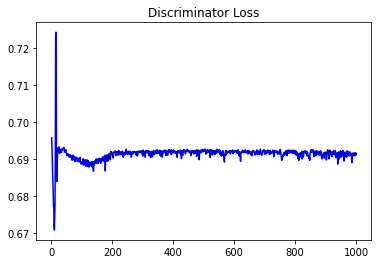

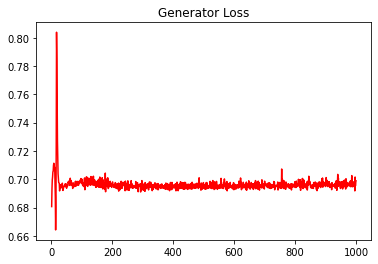

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.04218701431067001


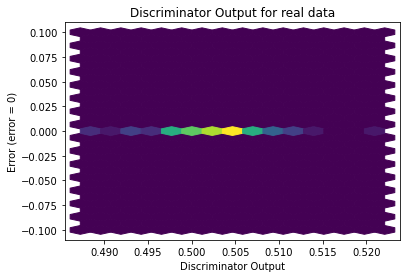

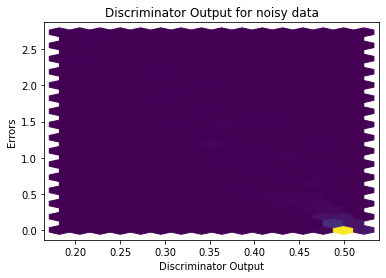

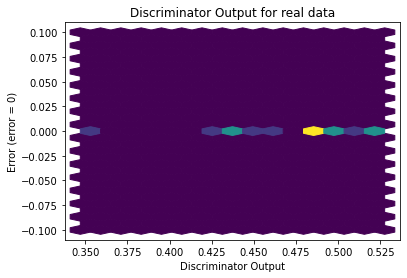

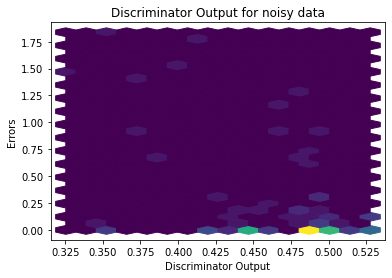

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


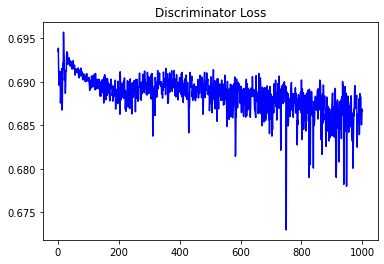

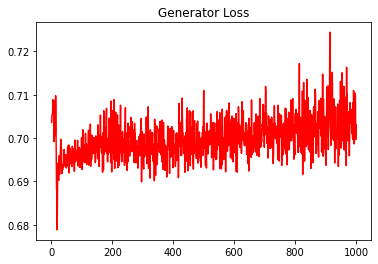

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.037546720881647684


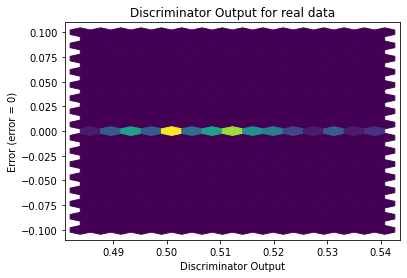

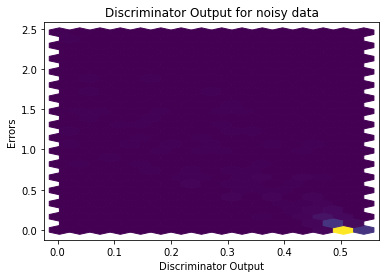

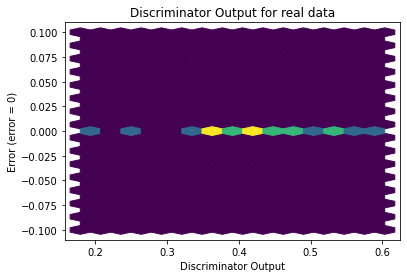

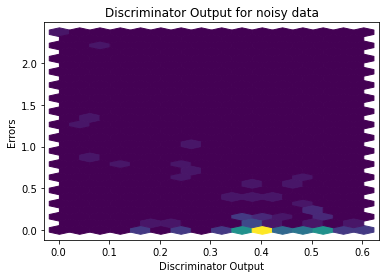

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1288]], requires_grad=True)
